In [1]:
%matplotlib inline
from ipywidgets import widgets 
from IPython.display import display, Math, Latex
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
from sympy import *
from numpy import * 
from numpy.linalg import inv
init_printing()

x = Symbol('x');
fx = Function('fx')(x);
gx = Function('gx')(x)
p = Function('p')(x)
rs = Function('rs')(x)
mf = Function('mf')(x)
mft = Function('mft')(x)

In [2]:
print("Ingrese el grado a utilizar:")
grado_input = widgets.BoundedIntText(
    value=0,
    min=1,
    max=4,
    disabled=False
)

display(grado_input)

print("Ingresar funcion f(x)=")
text_fx=widgets.Text(
    placeholder="Función f(x)"
);
display(text_fx)
print("Ingresar limite inferior")
text_li=widgets.BoundedFloatText(
    value=0,
    step=0.1,
    disabled=False
)
display(text_li)
print("Ingresar limite superior")
text_lf=widgets.BoundedFloatText(
    value=1,
    step=0.1,
    disabled=False
)
display(text_lf)

Ingrese el grado a utilizar:


BoundedIntText(value=1, max=4, min=1)

Ingresar funcion f(x)=


Text(value='', placeholder='Función f(x)')

Ingresar limite inferior


BoundedFloatText(value=0.0, step=0.1)

Ingresar limite superior


BoundedFloatText(value=1.0, step=0.1)

In [3]:
try:
    grado = grado_input.value
    fx = sympify(text_fx.value)
    li = int(text_li.value)
    ls = int(text_lf.value)
except:
    display(HTML("<h2 style='color:red'>Ups.. algo salio mal, revisar los datos ingresados</h2>"))
    
wizzard = [0]*(grado+1)
for i in range(0,grado+1):
    wizzard[i]=x**i
mf = Matrix([wizzard])

mft=mf.T

rs=mft*mf
display(HTML("<h3>Matriz de ecuaciones:</h3>"))
display(rs)

a = zeros(shape=(grado+1,grado+1));

for t in range(0,grado+1):
    for v in range(0,grado+1):
        gx = rs[v,t]
        nx = 5
        h = (ls-li)/(2*nx)
        
        I = gx.subs(x,li)

        #No es nx por la inclusion en funcion range()
        for i in range(1,nx+1):
            I = I + (4 * (gx.subs(x,li + (((2*i)-1)*h))))

        #Idem que el caso anterior
        for i in range(1,nx):
            I = I + (2 * (gx.subs(x,li + ((2*i)*h))))

        I = (h/3)*(I + gx.subs(x, ls))
        
        a[t,v]=I

b = zeros(shape=((grado+1),1))
for t in range(0,len(b)):
    nx = 5
    h = (ls-li)/(2*nx)
    
    gx = mft[t]*fx
    I = gx.subs(x,li)

    #No es nx por la inclusion en funcion range()
    for i in range(1,nx+1):
        I = I + (4 * (gx.subs(x,li + (((2*i)-1)*h))))

    #Idem que el caso anterior
    for i in range(1,nx):
        I = I + (2 * (gx.subs(x,li + ((2*i)*h))))

    I = (h/3)*(I + gx.subs(x, ls))
    b[t] = I
    
c= inv(a)@b

display(HTML("<h3>Matriz de coeficientes:</h3>"))
display(sympify(c))

p=0
for i in range(0,len(c)):
    p = p + sympify(c[i])*mft[i]

display(HTML("<h3>Funcion interpolante:</h3>"))

display(Math("P(x)="+latex(p)));



⎡         2⎤
⎢1   x   x ⎥
⎢          ⎥
⎢     2   3⎥
⎢x   x   x ⎥
⎢          ⎥
⎢ 2   3   4⎥
⎣x   x   x ⎦

⎡4.99999999999994⎤
⎢                ⎥
⎢      1.0       ⎥
⎢                ⎥
⎣      1.0       ⎦

<IPython.core.display.Math object>

In [4]:
print("Evaluar polinomio en un punto")
text_value = widgets.BoundedFloatText(
    value=0.0,
    step=0.1,
    description='x:',
    disabled=False
)
display(text_value)

Evaluar polinomio en un punto


BoundedFloatText(value=0.0, description='x:', step=0.1)

In [8]:
if(text_value != ""):
    display(Math("P("+latex(text_value.value)+")="+latex(p.subs(x,text_value.value))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

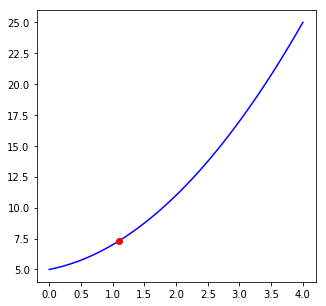

In [9]:
try:
    display(HTML("<h3>Grafica del polinomio:</h3>"))
    display(Math("P(x)="+latex(p)))
    fig,ax = plt.subplots(figsize=(5,5))
    f_l = lambdify(x,p)
    xv = linspace(li,ls,50)
    ax.plot(xv, f_l(xv),color='blue');
    ax.plot(text_value.value,p.subs(x,text_value.value), color ='red',marker='o');

except:
    display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica los datos introducidos</h2>"))